<a href="https://colab.research.google.com/github/tayfununal/Uniform-Autoencoder-with-Latent-Flow-Matching/blob/main/evaluations/swissroll_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/tayfununal/Uniform-Autoencoder-with-Latent-Flow-Matching.git

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch import Tensor

from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

import os

print(os.getcwd())

%run /content/Uniform-Autoencoder-with-Latent-Flow-Matching/models/swissroll_model.ipynb
%run /content/Uniform-Autoencoder-with-Latent-Flow-Matching/datasets/swiss_roll_dataset.ipynb

plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [ ]:
# Hyper-Parameters & Settings
dataset_size = 10000
batch_size = 500

In [ ]:
# Dataset
test_dataset = SwissRollDataset(mode='test', n_samples=dataset_size)

# DataLoader
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [ ]:
# Create the "results" folder
os.makedirs("/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll", exist_ok=True)

name = '/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll/UAE_SwissRoll'
model_eval = torch.load(name + '.model', weights_only=False)
model_eval.eval()

To_Uniform(
  (encoder): Sequential(
    (0): Linear(in_features=3, out_features=400, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=400, out_features=400, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=400, out_features=400, bias=True)
    (7): ReLU()
    (8): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=400, out_features=400, bias=True)
    (10): ReLU()
    (11): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=400, out_features=400, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Linear(in_features=400, out_features=2, bias=True)
    (16): Sigmoid()
  )
  (decoder): Sequential(
    (0): L

# MSE on Test Set

In [ ]:
X_test, y_test = test_dataset[:]

# Feed the test data into the model
with torch.no_grad():
    _ , x_hat = model_eval(X_test)

def mse_loss(x_true, x_pred):
    return torch.mean(((x_true - x_pred)**2)/(X_test.max()-X_test.min())**2)

# Compute the average MSE
mse = mse_loss(x_true=X_test, x_pred=x_hat)

print("Test MSE:", mse.item())

# Create the "results" folder
os.makedirs("/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll", exist_ok=True)

# Write to file
file_path = "/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll/test_mse.txt"
with open(file_path, "w") as f:
    f.write(f"Test MSE: {mse.item()}\n")

print(f"Test MSE results have been saved to the '/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll' directory: {file_path}")

Test MSE: 9.553893323754892e-05
Test MSE results have been saved to the '/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll' directory: /content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll/test_mse.txt


In [ ]:
from torchsummary import summary
summary(model_eval, input_size=(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]           1,600
              ReLU-2                  [-1, 400]               0
       BatchNorm1d-3                  [-1, 400]             800
            Linear-4                  [-1, 400]         160,400
              ReLU-5                  [-1, 400]               0
       BatchNorm1d-6                  [-1, 400]             800
            Linear-7                  [-1, 400]         160,400
              ReLU-8                  [-1, 400]               0
       BatchNorm1d-9                  [-1, 400]             800
           Linear-10                  [-1, 400]         160,400
             ReLU-11                  [-1, 400]               0
      BatchNorm1d-12                  [-1, 400]             800
           Linear-13                  [-1, 400]         160,400
             ReLU-14                  [

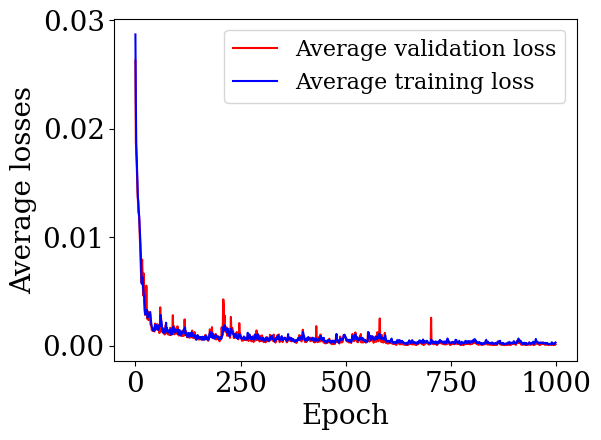

In [ ]:
# Load the losses
losses = np.loadtxt("/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll/losses.csv", delimiter=",", skiprows=1)
train_losses = losses[:, 0]
val_losses = losses[:, 1]

# Create a plot
plt.plot(val_losses, label="Average validation loss", c="red")
plt.plot(train_losses, label="Average training loss", c="blue")

plt.xlabel("Epoch")
plt.ylabel("Average losses")
plt.legend(loc='upper right', fontsize=16)

plt.tight_layout()
plt.savefig("/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll/average_losses_per_epoch.pdf")
plt.show()

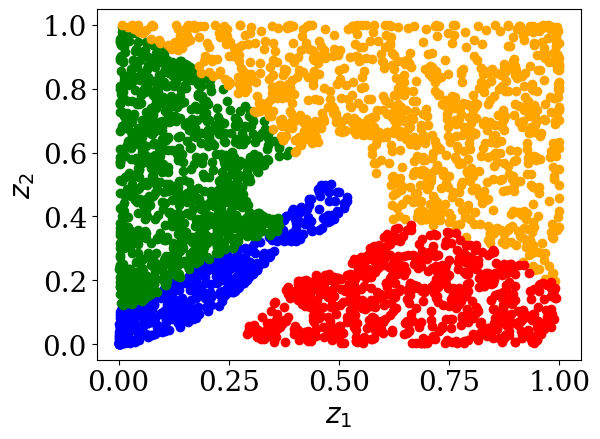

In [ ]:
X_test, y_test = next(iter(test_loader))

z, x_hat = model_eval(X_test[:])

# Class 0
plt.scatter(z.detach().numpy()[y_test==0, 0],
            z.detach().numpy()[y_test==0, 1], color='blue', label='0', alpha=1)

# Class 1
plt.scatter(z.detach().numpy()[y_test==1, 0],
            z.detach().numpy()[y_test==1, 1], color='green', label='1', alpha=1)

# Class 2
plt.scatter(z.detach().numpy()[y_test==2, 0],
            z.detach().numpy()[y_test==2, 1], color='orange', label='2', alpha=1)
# Class 3
plt.scatter(z.detach().numpy()[y_test==3, 0],
            z.detach().numpy()[y_test==3, 1], color='red', label='3', alpha=1)

plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

plt.tight_layout()
plt.savefig("/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll/swissroll_test_data_latent.pdf")
plt.show()

In [ ]:
!pip uninstall -y plotly kaleido
!pip install plotly==5.24.1 kaleido==0.2.1

In [ ]:
import plotly.express as px
import pandas as pd

# Convert tensors to NumPy arrays
X_np = x_hat.cpu().detach().numpy()
y_np = y_test.cpu().detach().numpy()

# Format the data as a DataFrame for Plotly
df = pd.DataFrame({
    'x1': X_np[:, 0],
    'x2': X_np[:, 1],
    'x3': X_np[:, 2],
    'label': [str(i) for i in y_np]  # Class labels are strings: '0', '1', '2', '3'
})

# Assign colors in a predefined order
color_order = ['0', '1', '2', '3']
colors = ['blue', 'green', 'orange', 'red']

fig = px.scatter_3d(
    df,
    x='x1',
    y='x2',
    z='x3',
    color='label',
    category_orders={'label': color_order},  # Fixed class order
    color_discrete_sequence=colors,
    labels={'x1': 'x₁', 'x2': 'x₂', 'x3': 'x₃'},
)

fig.update_layout(
    margin=dict(l=0, r=0, t=20, b=0),
    scene=dict(
        # Make axis values bold
        xaxis=dict(dtick=0.2),
        yaxis=dict(dtick=0.2),
        zaxis=dict(dtick=0.2),

        xaxis_title_font=dict(
            size=30,
        ),
        yaxis_title_font=dict(
            size=30,
        ),
        zaxis_title_font=dict(
            size=30,
        )
    ),
    font=dict(  # Global font setting for all text
        family='Times New Roman',
        size=15,  # Global font size
    ),
    scene_camera=dict(
        eye=dict(x=1, y=2, z=0.5)  # Camera position
    ),
    legend_title_text='Class',
    legend=dict(
        font=dict(size=22),  # Legend text
        title_font=dict(     # Legend title
            family='Times New Roman',
            size=22,
            color='black'
        )
    )
)
fig.update_traces(marker=dict(size=4))
fig.write_image("/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll/swissroll_test_data_prod.pdf", format="pdf")
fig.show()

In [ ]:
uniform_dist = torch.distributions.uniform.Uniform(low=torch.zeros((2,)), high=torch.ones((2,)))
new_data = model_eval.decoder(uniform_dist.sample((5000,)))

# Convert tensors to NumPy arrays
x_np = new_data.cpu().detach().numpy()

# Create a DataFrame
df = pd.DataFrame({
    'x1': x_np[:, 0],
    'x2': x_np[:, 1],
    'x3': x_np[:, 2]
})

# Plot with Plotly
fig = px.scatter_3d(df, x='x1', y='x2', z='x3', opacity=1.0)

# Assign green color
fig.update_traces(marker=dict(color='green'))

# Make axis labels subscripted
fig.update_layout(
    margin=dict(l=0, r=0, t=20, b=0),
    scene=dict(
        # Make axis values bold
        xaxis=dict(dtick=1),
        yaxis=dict(dtick=1),
        zaxis=dict(dtick=1),

        # Axis labels
        xaxis_title='x\u2081',
        yaxis_title='x\u2082',
        zaxis_title='x\u2083',

        xaxis_title_font=dict(
            size=26,
        ),
        yaxis_title_font=dict(
            size=26,
        ),
        zaxis_title_font=dict(
            size=26,
        )
    ),
    font=dict(  # Global font setting for all text
        family='Times New Roman',
        size=15,  # Global font size
    ),
    scene_camera=dict(
        eye=dict(x=0, y=2.2, z=0)  # Camera position
    ),
    legend_title_text='Class',
    legend=dict(
        font=dict(size=22),  # Legend text
        title_font=dict(     # Legend title
            family='Times New Roman',
            size=22,
            color='black'
        )
    )
)
fig.update_traces(marker=dict(size=4))

fig.write_image("/content/Uniform-Autoencoder-with-Latent-Flow-Matching/results/swissroll/uniform_to_swissroll.pdf", format="pdf")
fig.show()